# Minería de Reglas de asociación 

(*Association Rule Mining*)

La minería de reglas de asociación se usa cuando desea encontrar una asociación entre diferentes objetos en un conjunto, buscar patrones frecuentes en una base de datos de transacciones, bases de datos relacionales o cualquier otro repositorio de información. 

Las aplicaciones de *ARM* se encuentran en Marketing, Análisis de datos de cesta (o Análisis de cesta de mercado) en venta minorista, agrupación y clasificación. Puede decirle qué artículos compran juntos con frecuencia los clientes al generar un conjunto de reglas llamadas **Reglas de asociación**. En palabras simples, le da salida como reglas en forma *si esto, entonces eso*. Los clientes pueden usar esas reglas para numerosas estrategias de marketing:


-  Cambiar el diseño de la tienda según las tendencias.
-  Análisis del comportamiento del cliente.
-  Diseño del catálogo.
-  Marketing cruzado en tiendas en línea.
-  ¿Cuáles son los artículos de tendencia que los clientes compran?
-  Correos electrónicos personalizados con ventas adicionales.


Considere el siguiente ejemplo:

<img src="images/im1_ar.png" width="500" height="300">

Se tiene un conjunto de datos de transacciones. Puede ver las transacciones numeradas del 1 al 5. Cada transacción muestra los artículos comprados en esa transacción. Puede ver que el pañal se compra con cerveza en tres transacciones. Del mismo modo, el pan se compra con leche en tres transacciones, lo que los convierte en conjuntos de artículos frecuentes. Las reglas de asociación se dan de la siguiente manera:

$$
A \Rightarrow B [Soporte, Confianza]
$$

También se lee como *Antecedente* $\Rightarrow$ *Consecuente*.

$A$ y $B$ son conjuntos de ítems en los datos transaccionales y son disjuntos. Ejemplo:

$$
Computadora \Rightarrow Antivirus [Soporte=20\%, Confianza=60\%]
$$

que se lee como:

-  $20\%$ de transacciones muestran que el antivirus se compra con la compra de una computadora.

-  El $60\%$ del total del ventas de computadora, también compra antivirus.

Veamos algunos conceptos básicos

<img src="images/im2_ar.png" width="500" height="300">

1. Itemset: Colección de uno o más ítems. Un conjunto $k-item$ contiene $k$ items.

2. Conteo de soporte: frecuencia de ocurrencia de un conjunto de ítems.

3. Soporte ($s$): Porcentaje de transacciones que contienen el conjunto de ítems $X$.

$$
Soporte(X) = \frac{frecuencia(X)}{N}
$$


Para la regla $A \Rightarrow B$, el Soporte está dado por:

$$
Soporte(A \Rightarrow B) = \frac{frecuencia(A,B)}{N}
$$

Nota: $P(A\cup B)$ es la probabilidad conjunta de $A$ y $B$.

**Ejercicio** Encuentra el soporte de $Leche \Rightarrow Pañal$



1. Confianza ($c$): En la regla $A \Rightarrow B$ la confianza muestra el porcentaje en la que $A$ y $B$ se compran juntos respecto al número total de transacciones que contienen $A$.


$$
Confianza(A \Rightarrow B) = \frac{P(A\cap B)}{P(A)} = \frac{frecuencia(A,B)}{frecuencia(A)}
$$

Ejemplo:

$$
Confianza(Pan \Rightarrow Leche) = \frac{3}{4} = 0.75 
$$

**Ejercicio** Encuentra la confianza de $Leche \Rightarrow Pañal$


Nota: El analista debe establecer el soporte y confianza mínimos que desea. 



1. *Itemsets* frecuentes: Los conjuntos de clientes cuyo soporte es mayor o igual al soporte mínimo (*min_sup*).

2. Reglas fuertes: Si la regla $A \Rightarrow B [Soporte, Confianza]$ cumple con $min_{sup}$ y $min_{confianza}$ entonces es una *regla fuerte*.

3. *Lift*: es la *correlación* entre $A$ y $B$ en la regla $A \Rightarrow B$

$$
Lift(A \Rightarrow B) = \frac{Soporte(A,B)}{Soporte(A)Soporte(B)}
$$

Ejemplo: $Pan \Rightarrow Leche$

$$
Lift(Pan \Rightarrow Leche) = \frac{Soporte(Pan,Leche)}{Soporte(Pan)Soporte(Leche)} = \frac{0.6}{0.8\times0.8} = 0.9
$$


-  Si el *Lift* es 1, entonces A y B son independientes y no se puede extraer una regla.

-  Si el *Lift* es > 1, entonces A y B son dependientes y el grado de dependencia se da por el valor.

-  Si el *Lift* es < 1, entonces A tiene un efecto negativo en B.


4. *Coverage*: es el soporte de la parte izquierda de la regla (antecedente). Se interpreta como la frecuencia con la que el antecedente aparece en el conjunto de transacciones.

$$
Coverage(Pan \Rightarrow Leche) =Soporte(Pan) = 0.8
$$

## Algoritmo apriori

1. Generación del conjunto de ítems frecuente: Encontrar todos los conjuntos de ítems cuyo soporte sea >= al *min_sup*

2. Generación de la regla: Listar todas las reglas de asociación de los conjuntos de ítems frecuentes. Calcular el soporte y la confianza de todas las reglas. Podar las reglas que no cumplen con *min_sup* ni *min_confianza*

<img src="images/im3_ar.png" width="500" height="300">

### Ejemplo en Python

In [1]:
import numpy as np
import pandas as pd
# Productos simulados
products = ['milk', 'bread', 'butter', 'apples', 'bananas', 'eggs', 'cheese', 'yogurt']

# Crear 1000 transacciones aleatorias con presencia (1) o ausencia (0) de cada producto
np.random.seed(42)
n_transactions = 1000
groceries_data = pd.DataFrame(np.random.randint(2, size=(n_transactions, len(products))), columns=products)

groceries_data.head()

,milk,bread,butter,apples,bananas,eggs,cheese,yogurt
0,0,1,0,0,0,1,0,0
1,0,1,0,0,0,0,1,0
2,1,1,1,0,1,0,1,1
3,1,1,1,1,1,1,0,0
4,1,1,1,0,1,0,0,0


In [2]:
from mlxtend.frequent_patterns import apriori, association_rules  # Para minería de reglas de asociación
import matplotlib.pyplot as plt  # Para gráficos (equivalente a ggplot2)
import seaborn as sns  # Para visualización de datos
from datetime import datetime  # Equivalente a lubridate

ModuleNotFoundError: No module named 'mlxtend'

In [29]:
# Suponiendo que 'groceries_data' es un DataFrame con transacciones binarias (uno para presencia del producto, cero para ausencia)

groceries_data = groceries_data.astype(bool)
# Aplicar el algoritmo Apriori
frequent_itemsets = apriori(groceries_data, min_support=0.001, use_colnames=True)

# Generar las reglas de asociación
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.8)

# Mostrar las 10 reglas con el mayor 'lift'
rules.sort_values('lift', ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,"(milk, butter, apples, yogurt, eggs, bread, ch...",(bananas),0.009,0.510,0.008,0.888889,1.742919,0.003410,4.410000,0.430121
0,"(butter, apples, yogurt, eggs, cheese, bananas)",(bread),0.017,0.501,0.014,0.823529,1.643771,0.005483,2.827667,0.398416
2,"(milk, butter, apples, yogurt, bread, cheese, ...",(eggs),0.010,0.494,0.008,0.800000,1.619433,0.003060,2.530000,0.386364


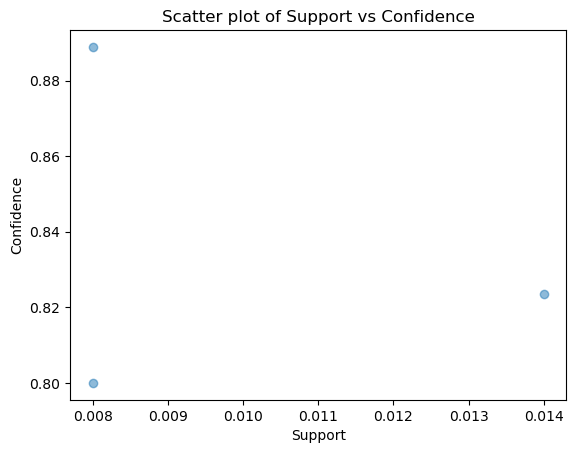

In [30]:
# Visualización de las reglas (por ejemplo, usando un gráfico de dispersión)
import seaborn as sns
import matplotlib.pyplot as plt

plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Scatter plot of Support vs Confidence')
plt.show()